# Titanic: Machine Learning from Disaster #

## Fall 2017 | CSE627 | Dr. Femiani
### Matt DePero | Andy Jeffers | Shrawani Silwal

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problem Description

The RMS Titanic is a ship that will live in infamy. On April 15, 1912, during her maiden voyage, the Titanic collided with an iceberg, sinking the seemingly "unsinkable" ship. As the ship went down, so too did 1,502 of her 2,224 passengers and crew (Kaggle Inc, 2017).

We now look to turn tragedy into education: is it possible to predict who would have survived the sinking of the RMS Titanic?

This report outlines our team's analysis of the problem and our eventual solution to attempting to predict survivors of the Titanic.

## Data Analysis

In [2]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

We begin our analysis by reading in our training and test data. Right away, we drop the PassengerId feature from both; it's not useful to us. We do, however, record the PassengerIds of our test data as they are needed to generate a proper output file.

In [3]:
# Read in training data, dropping PassengerId
X_train = pandas.read_csv('train.csv')
X_train.drop(['PassengerId'], axis=1, inplace=True)

# Read in test data, recording extracted PassengerIds
X_test = pandas.read_csv('test.csv')
test_pIds = X_test.pop('PassengerId')

We'll next look at some metadata on our input data. After executing the next cell, notice that 'Age' is not recorded for every person in the training data.

In [4]:
# Generate meta data on the training data. Note that 'PassengerId' was removed.
X_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's take a look at our first five entries, just to get a feel for how the actual data looks.

In [5]:
# Preview the training data. Note that 'PassengerId' was removed.
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see there are numerous features available within the training data, some of which may or may not be useful in our analysis of survivors of the sinking of the Titanic. These features are described as such:
<bl>
    <li><u>Survived:</u> Whether a passenger lived or died.</li>
    <li><u>Pclass:</u> What class was the passenger?</li>
    <li><u>Name:</u> The passenger's name.</li>
    <li><u>Sex:</u> The passenger's sex.</li>
    <li><u>Age:</u> The passenger's age.</li>
    <li><u>SibSp:</u> The number of siblings or spouses onboard.</li>
    <li><u>Parch:</u> The number of parents/children onboard.</li>
    <li><u>Ticket:</u> Ticket number.</li>
    <li><u>Fare:</u> Fare price.</li>
    <li><u>Cabin:</u> Cabin number.</li>
    <li><u>Embarked:</u> Where a passenger embarked.</li>
<bl>
<br>

Let's do a breakdown of raw survivors.

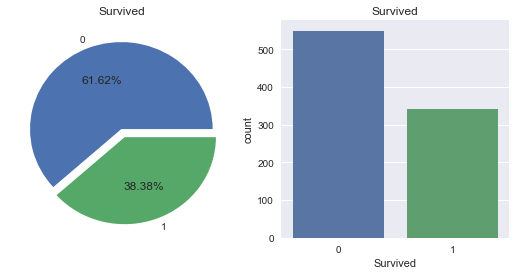

In [6]:
# Plot the number of survivors and non-survivors
f,ax=plt.subplots(1,2,figsize=(9,4))

X_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=X_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

As we can see, only 38.38% of passengers within our training data survived. Keeping that percentage in mind, let's next look at the spread of our numerical features to gain a better grasp on how those features appear at a higher level.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011103344EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000011103504C18>]], dtype=object)

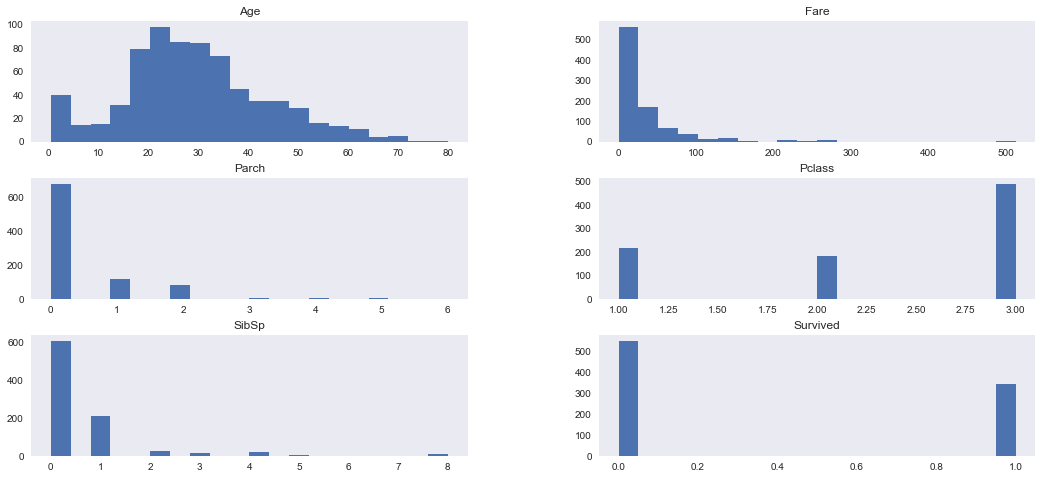

In [7]:
# Plot our numerical features
X_train.hist(bins=20,figsize=(18,8),grid=False)

With the many features listed above (and those are only the numerical ones!), it's easy to get overwhelmed. It would be nice if we could determine a correlation between our numerical features and survival. Let's do just that!

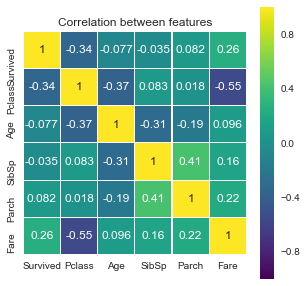

In [8]:
# Plot a heat map of the correlation between features
plt.figure(figsize=(5, 5))
sns.heatmap(X_train.corr(), linewidths=0.01, square=True,annot=True,cmap=plt.cm.viridis,linecolor="white")
plt.title('Correlation between features')
plt.show()

As we can see from the above heat map, some features are more correlated with survival than others. Let's take a closer look some of the features above, as well as some non-numerical features, with respect to survival.

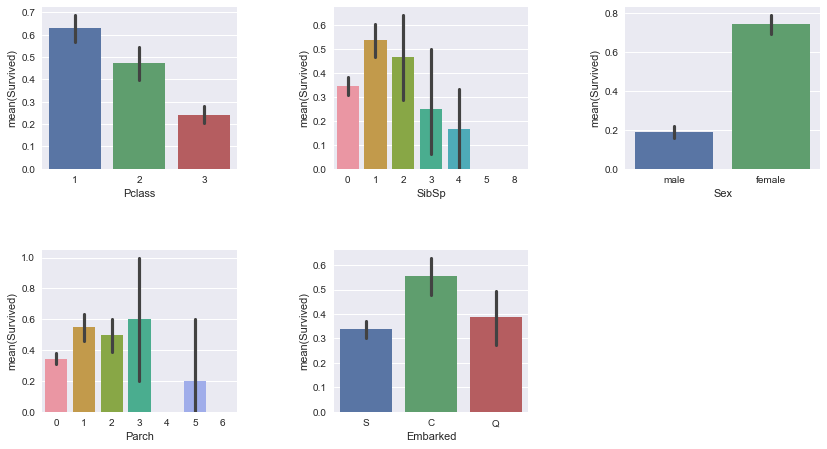

In [9]:
# Plot various features and mean survival rate
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.barplot('Pclass', 'Survived', data=X_train)
plt.subplot(332)
sns.barplot('SibSp', 'Survived', data=X_train)
plt.subplot(333)
sns.barplot('Sex', 'Survived', data=X_train)
plt.subplot(334)
sns.barplot('Parch', 'Survived', data=X_train)
plt.subplot(335)
sns.barplot('Embarked', 'Survived', data=X_train)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

Let's drill down into a few features which one might speculate are of greater importance than the rest. Let's start with 'Age.'

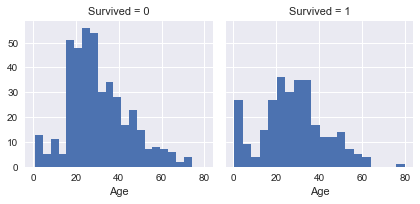

In [10]:
# Explore the relationship between 'Age' and survival
sns.FacetGrid(X_train, col='Survived').map(plt.hist, 'Age', bins=20)
plt.show()

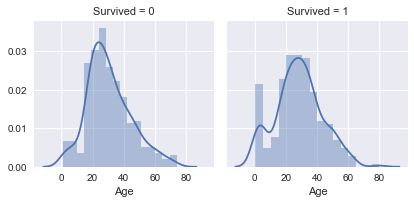

In [11]:
# Fit distributions to the relationships between 'Age' and survival
g = sns.FacetGrid(X_train, col='Survived')
g = g.map(sns.distplot, "Age")

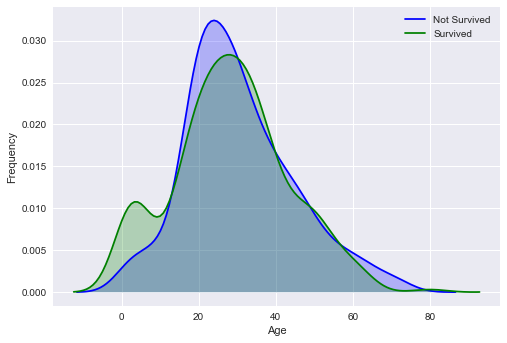

In [12]:
# Overlay the distributions of the relationships between 'Age' and survival
g = sns.kdeplot(X_train["Age"][(X_train["Survived"] == 0) & (X_train["Age"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(X_train["Age"][(X_train["Survived"] == 1) & (X_train["Age"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

Given the above, it appears that 'Age,' at least on its own, is not very useful for determining survival. Let's try another feature. Perhaps 'Sex' can be more illuminating.

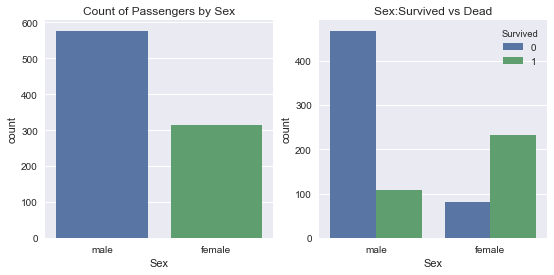

In [13]:
# Examine 'Sex'
f,ax=plt.subplots(1,2,figsize=(9,4))
sns.countplot('Sex',data=X_train, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('Sex',hue='Survived',data=X_train, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

As the above graph on the left shows, more males than females were onboard the Titanic, at least in our training data. Perhaps even more important is the second graph above; there is a clear correlation between 'Sex' and survival as females appear to have a greater chance of survival than males. Perhaps "women and children first" rang true when the Titanic sank.

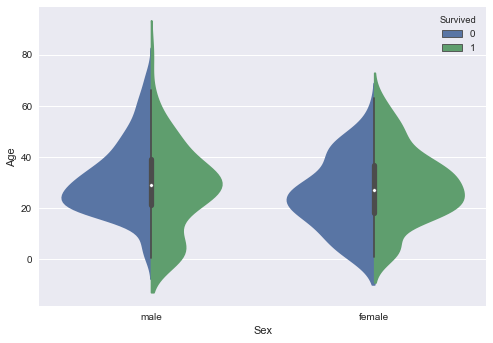

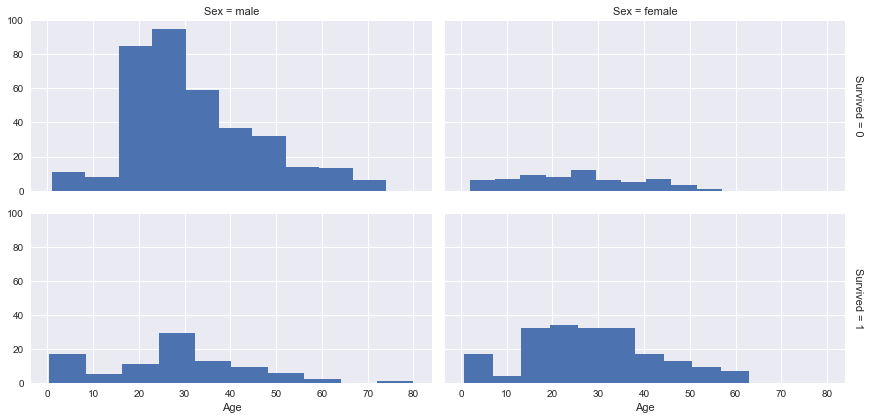

In [14]:
# Explore the joint effect of 'Sex' and 'Age' on survival
sns.violinplot("Sex","Age", hue="Survived", data=X_train,split=True)
plt.show()

# For each sex, create a histrogram for the relationship between 'Age' and survival
g = sns.FacetGrid(X_train, col="Sex", row="Survived", size=3, aspect=2,  margin_titles=True)
g.map(plt.hist, "Age")

Plotting the joint relationship between 'Age' and 'Sex,' and survival leads to a rather ambiguous result: it's not clear if more or less information is gleaned from such an approach as implemented above. It's possible that by incorporating further features within our analysis, we can determine even better correlation between features and survival. But to find such an improvement, the data must be cleaned and a suitable model selected.

## Data Cleaning
As evident from the previous section, there exists interesting correlation among the data.In this section the focus is on transforming specific features to a form which can be easily passed to machine learning algorithms.We also create/engineer new features which is helpful in building model.

The process of data cleaning and engineering is divided into various functions for readability.

In [15]:
#combining the train and test data, so that we avoid any error raised due to mismatch in features in these data sets
def get_combined_data():
    # extracting and then removing the targets from the training data 
    targets = X_train.Survived
    # merging train data and test data for future feature engineering
    combined = X_train.append(X_test)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined
combined = get_combined_data()
pandas.options.mode.chained_assignment = None  # default='warn'
combined.shape

(1309, 11)

Let's extract the title by  parsing the name,which can be used as an additional information about the social status.

In [16]:
def get_titles():
    global combined
    # extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip()) 
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                       }
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
get_titles()
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr


The Age variable is missing 177 values, which is a significant percentage.Let's group the dataset by Sex, Title and passenger class and for each subset compute the median age.

In [17]:
grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [18]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
             
process_age()
pandas.options.mode.chained_assignment = None  # default='warn'

Instead of using the Name column,let's make use of Title column created above and encode the values using dummy encoding.This function drops the Name column.

In [19]:
def process_names():
    global combined
    #clean the Name variable
    combined.drop('Name',axis=1,inplace=True) 
    # encoding in dummy variable
    titles_dummies = pandas.get_dummies(combined['Title'],prefix='Title')
    combined = pandas.concat([combined,titles_dummies],axis=1) 
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)
process_names()
combined.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,NaN,S,7.2500,0,3,male,1,0.0,A/5 21171,0,0,1,0,0,0
1,38.0,C85,C,71.2833,0,1,female,1,1.0,PC 17599,0,0,0,1,0,0
2,26.0,NaN,S,7.9250,0,3,female,0,1.0,STON/O2. 3101282,0,1,0,0,0,0
3,35.0,C123,S,53.1000,0,1,female,1,1.0,113803,0,0,0,1,0,0
4,35.0,NaN,S,8.0500,0,3,male,0,0.0,373450,0,0,1,0,0,0


The process_fares() function simply replaces the missing Fare values by the mean.

In [20]:
def process_fares():
    global combined
    # replacing missing fare value with the mean.
    combined.head(891).Fare.fillna(combined.head(891).Fare.mean(), inplace=True)
    combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(), inplace=True)
process_fares()

The process_embarked() function replaces the  missing values of Embarked with the most frequent Embarked value.

In [21]:
def process_embarked():    
    global combined
    # missing embarked values - filling them with the most frequent one (S)
    combined.head(891).Embarked.fillna('S', inplace=True)
    combined.iloc[891:].Embarked.fillna('S', inplace=True)     
    # dummy encoding 
    embarked_dummies = pandas.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pandas.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
process_embarked()   

The process_cabin() function replaces NaN values with U (for Unknown). It then maps existing Cabin value to the first letter and then it encodes the cabin values using dummy encoding.

In [22]:
def process_cabin():  
    global combined 
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    # dummy encoding 
    cabin_dummies = pandas.get_dummies(combined['Cabin'], prefix='Cabin')
    combined = pandas.concat([combined,cabin_dummies], axis=1)
    combined.drop('Cabin', axis=1, inplace=True)
process_cabin()

The process_sex() function maps the string values male and female to 1 and 0 respectively.

In [23]:
def process_sex(): 
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
process_sex()

The process_pclass() function encodes the values of Pclass (1,2,3) using a dummy encoding.

In [24]:
def process_pclass():
    global combined
    # encoding into 3 categories:
    pclass_dummies = pandas.get_dummies(combined['Pclass'], prefix="Pclass")
    # adding dummy variables
    combined = pandas.concat([combined,pclass_dummies],axis=1)
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
process_pclass()

The process_ticket() function preprocess the tikets first by extracting the ticket prefix. Incase of  failure  in extracting a prefix it returns XXX.It then encodes the prefixes using dummy encoding.

In [25]:
def process_ticket():
    global combined
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
       # ticket = filter(lambda t : not t.isdigit(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    # Extracting dummy variables from tickets:
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pandas.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pandas.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
process_ticket()

The process_family() function includes creating new variables based on the size of the family.
This function introduces 4 new features:<br>
FamilySize : the total number of relatives including the passenger (him/her)self.<br>
Sigleton : a boolean variable that describes families of size = 1<br>
SmallFamily : a boolean variable that describes families of 2 <= size <= 4<br>
LargeFamily : a boolean variable that describes families of 5 < size<br>

In [26]:
def process_family(): 
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1 
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)
process_family()

As the name suggests recover_train_test_target() if for recovering the train set and the test set from the combined dataset above.

In [27]:
def recover_train_test_target():
    global combined
    train0 = pandas.read_csv('train.csv')   
    targets = train0.Survived
    train = combined.head(891)
    test = combined.iloc[891:]
    return train, test, targets
X_train,X_test, targets = recover_train_test_target()

### Feature Selection
It is important to choose the right number of features that capture the essential details.
To compute feature importances,tree-based estimators can be used, which helps to discard irrelevant features.

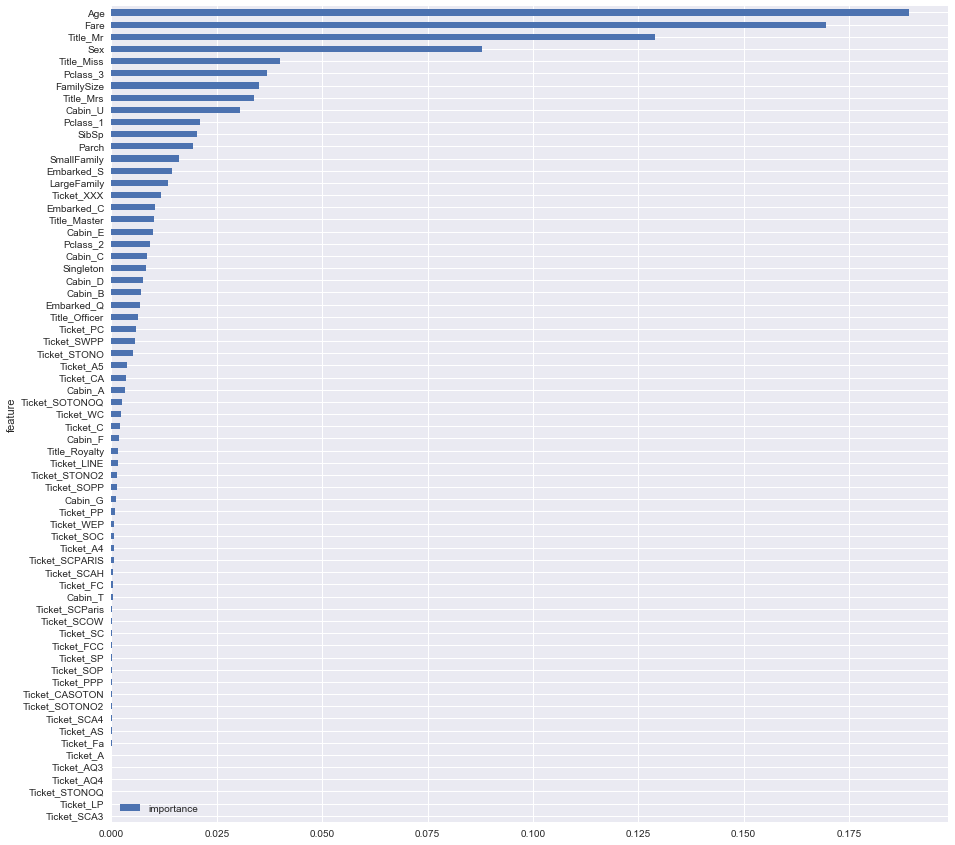

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
X_train_=X_train.copy()
X_train_.drop('Survived',axis=1,inplace=True)
clf = clf.fit(X_train_, targets)
features = pandas.DataFrame()
features['feature'] = X_train_.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(15, 15))
pandas.options.mode.chained_assignment = None  # default='warn'

From above we can notice that there is a great importance linked to  Age, Fare,Title_Mr and Sex.

## Solution

### Random Forest

The random forest is where our group found initial success. With just a quick and dirty random forest working only with numerical features, we achieved a 66.985% accuracy rate (not too bad for a basic attempt!). Our next submission included categorical features, which, as one would expect, increased our accuracy, raising it to 73.684%. Varying random forest parameters such as the number of trees in our forest and the minimum number of samples required to be at a leaf node, we next achieved an accuracy of 77.99%, a plateua we could not overcome for quite some time. Finally, after implementing the creative data massaging above in the Data Cleaning section, and further tweaking our random forest parameters, we achieved our best random forest result: 79.904% accuracy.

### TensorFlow

#### Set Up

TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is used for machine learning applications such as neural networks and is used and maintained heavily by Google for both research and production applications. For example, TensorFlow is used by DeepDream, Google's convolutional neural network that finds and enhances patterns in images and is known for it's "hallucinogenic" results in images.

The primary motivation behind utilizing TensorFlow was it's ability to run learning operations on a computer's GPU. This can drastically increase the speed at which learning can occur and thus allows much more complicated models to be trained.

Setting up a GPU enabled environment in TensorFlow, however, proved more challenging than expected. The GPU powered backend is written in CUDA, NVidia's parallel computering interface. The largest obstacle was attempting to install this environment on the Windows 10 Ubuntu bash client which was later found to not be compatible with GPU hardware. Looking up online for installation instructions for Anaconda on Windows proved more useful and we did, eventually, get the GPU enabled environment working.

#### Implementation

Due to the extensive amount of time spent setting up the training environment (reflected on in conclusions below), we were left with unfortunately little time to actually learn in depth the features and complixities of using TensorFlow, of which there are many. As a result, our model ending up being extremely simple and can be reproduced below in only a few lines of code. That being said, the quality results of even this simply model only proves the power of TesorFlow and its supervised learning potential.

Below is a code snippet from our TensorFlow implementation, with minimal data processing to keep the code short.

In [29]:
import tensorflow as tf

In [30]:
# === Prepare Data Matrix ===

# make 15% of training data validation data that isn't used for training
train_data, validation_data = train_test_split(X_train, test_size=0.15)

# creation of one hot matrix for targets
train_data = train_data.sort_index()
validation_data = validation_data.sort_index()
X_test.pop('Survived')
test_data = X_test.sort_index()

y_train_data = train_data.pop('Survived')
y_matrix = np.zeros((len(y_train_data), 2))
y_matrix[np.arange(len(y_train_data)), np.array(y_train_data).astype(int)] = 1

y_validate_data = validation_data.pop('Survived')
y_matrix_validate = np.zeros((len(y_validate_data), 2))
y_matrix_validate[np.arange(len(y_validate_data)), np.array(y_validate_data).astype(int)] = 1

X_matrix = train_data.values
X_matrix_validate = validation_data.values
X_matrix_test = test_data.values

# Remove anywhere a non number exists (Embarked)
y_matrix = y_matrix[~np.isnan(X_matrix).any(axis=1)]
X_matrix = X_matrix[~np.isnan(X_matrix).any(axis=1)]
y_matrix_validate = y_matrix_validate[~np.isnan(X_matrix_validate).any(axis=1)]
X_matrix_validate = X_matrix_validate[~np.isnan(X_matrix_validate).any(axis=1)]

In [31]:
# === Create Training Graph ===
def training_graph(training_epochs, hidden_layer_outputs_array, num_data_points=300):

    display_epoch = int(training_epochs/num_data_points)
    
    
    global X_matrix, y_matrix
    num_inputs = len(X_matrix[0])
    num_outputs = len(y_matrix[0]);

    # Input
    x = tf.placeholder(tf.float32, (None, num_inputs), name='x')
    y = tf.placeholder(tf.float32, (None, num_outputs), name='y')
    ec = tf.argmax(y, 1, name='ec')

    # Hidden layers
    output = x
    logit = None
    layers = 1
    for outputs in hidden_layer_outputs_array:
        prev_inputs = int(output.get_shape()[1])
        b = tf.Variable(tf.zeros(outputs), name='b'+str(layers))
        W = tf.Variable(tf.truncated_normal([prev_inputs, outputs]), name='W'+str(layers))
        a = tf.add(tf.matmul(output, W), b, name='a'+str(layers))
        z = tf.nn.softmax(a, name='z'+str(layers))
        output = z
        logit = a
        layers += 1

    # Output Layer
    outputs = num_outputs # use the number of outputs in the targets (2)
    prev_inputs = int(output.get_shape()[1])
    b = tf.Variable(tf.zeros(outputs), name='b'+str(layers))
    W = tf.Variable(tf.truncated_normal([prev_inputs, outputs]), name='W'+str(layers))
    a = tf.add(tf.matmul(output, W), b, name='a'+str(layers))
    z = tf.nn.softmax(a, name='z'+str(layers))
    output = z
    logit = a
    layers += 1

    pc = tf.argmax(output, 1, name='pc')

    # Loss
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logit)
    loss = tf.reduce_mean(cross_entropy, name='loss')

    # Solver
    solver = tf.train.AdamOptimizer()
    optimize = solver.minimize(loss)

    # Accuracy
    correct = tf.equal(ec, pc, name='correct')  
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='acc')
    
    train(training_epochs, display_epoch, accuracy, optimize, loss, x, y, hidden_layer_outputs_array)

In [32]:
# Training cycle
def train(training_epochs, display_epoch, accuracy, optimize, loss, x, y, layers_arr):
    
    global X_matrix, y_matrix, X_matrix_validate, y_matrix_validate, X_matrix_test
    
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())

    loss_   = sess.run(accuracy, {x:X_matrix, y:y_matrix})

    displays = [[],[]]
    
    
    for epoch in range(training_epochs):

        if (epoch) % display_epoch == 0:
            val_acc = sess.run(accuracy, {x:X_matrix_validate, y:y_matrix_validate})
            displays[0].append(epoch)
            displays[1].append(val_acc)
        
        
        _, loss_ = sess.run([optimize, loss],
                                {x: X_matrix, y: y_matrix})
    
    layers = str(len(layers_arr))
    layers_str = " ".join([str(e) for e in layers_arr])
    plt.plot(displays[0], displays[1], 
             label=layers+" layers: "+layers_str)

Cost is our evaluation function that measures the accuracy of predicting on our training set which we are trying to minimize. Accuracy is a measure of how well our model is doing by checking the percent of correct predictions we made on our validation set, which importantly is not included in our training data set and is thus never seen by our training model.

Because the above operations are powered by a large GPU, execution is relatively fast (decently accurate results within only a few seconds). Additionally, the model is decently good at not overfitting, despite it being a very simple model. This can be seen by how our accuracy stays fairly high even as we continue to train on data not in the validation set.



#### Training

The method created above training_graph() allows us to run independant trials of training with different hyper parameters. We can specify how many rounds of training we want to run, how many hidden layers we want to create, and how many connections between those hidden layers we want.

For example, if we want two hidden layers, one with 6 connections and one with 4 connections, we can call training_graph(100, \[6, 4\]) and our tensorflow graph will look like this (keep in mind we have 7 inputs features and 2 outputs features, survived or not survived)...

training_graph(100, \[6, 4\]):

input -> (7, 6) -> (6, 4) -> (4, 2) -> output

By using this lavel of abstraction, we can graph what different training graphs look like. Note that this is graphing accuracy of our validation data, not the accuracy of our training data.

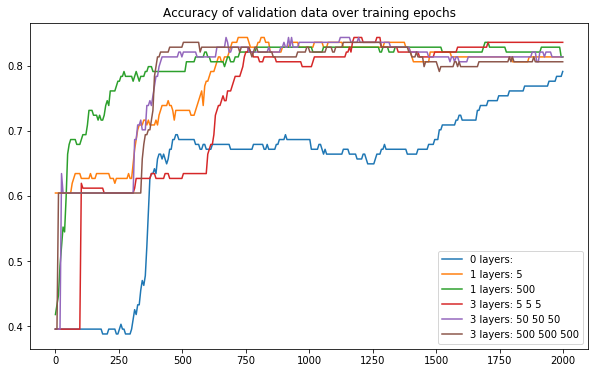

In [33]:
# Note that training_graph() starts a clean training attempt every time (resets tensorflow variables)

plt.figure(figsize=(10,6))
plt.title("Accuracy of validation data over training epochs")

training_graph(2000, [])
training_graph(2000, [5])
training_graph(2000, [500])
training_graph(2000, [5, 5, 5])
training_graph(2000, [50, 50, 50])
training_graph(2000, [500, 500, 500])

plt.legend(loc='best')
plt.show()

It's also important to note that training differs every time the training graph is run. This has proved problematic, as some training attempts create accurate results while others don't. This makes it difficult to figure out which training graphs are high quality and which are not in terms of submitting our final results (especially since running the training cycle for too long results in over fitting).

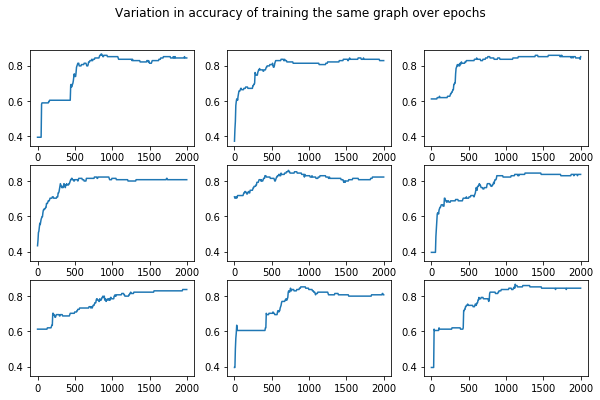

In [37]:
plt.figure(figsize=(10,6))
previous = None
for i in range(1,10):
    if previous != None:
        cur = plt.subplot(3,3,i, sharey=previous) # make y axis same for all subplots
    else:
        cur = plt.subplot(3,3,i)
    previous = cur
    training_graph(2000, [10, 10])

plt.suptitle("Variation in accuracy of training the same graph over epochs")
plt.show()

## Conclusion

In Kaggle, we were able to accomplish an accuracy of .79904 on the test data. This result actually did not come from TensorFlow, but rather from our original RandomForest implementation using the intelligently cleaned data from the above section. TensorFlows results were very variable, and our best result from TensorFlow ended up only being .7847, which is only marginally worse.

While we had the ability to try and test a wide range of different hyper parameters for training in TensorFlow, as can be seen from the graphs above, the results of a wide range of hyper parameters were fairly consistent yet random. As a result, one area of continued research would be to more formalize the analysis of the different configurations and have a better system for choosing which configuration to use.

An additional reflection is that setting up an environment to take advantage of my GPU was very tedious. There is very little user friendly documentation for setting up graphics drivers, and versions become important for making sure that all parts of the system are compatible.

Overall, this project provided the opportunity to gain a huge amount of experience in analyzing data, cleaning data, and using TensorFlow to create a training graph and output those predictions. It also exposed a large amount of learning that still has to be done in order to more effectively create TensorFlow models and make better decisions in how we configure and test those models.

## References

Kaggle Inc. (2017). Titanic: Machine learning from disaster. Retrieved October 30, 2017 from https://www.kaggle.com/c/titanic